# What drives the price of a car?

## Overview

In this practical application of the Machine Learning and Artificial Intelligence certification at UC Berkeley, a dataset from kaggle will be used. The original dataset contained information on 3 million used cars but the dataset will be limited to the information on 426K cars to ensure speed of processing.  The goal is to understand what factors make a car more or less expensive.  As a result of the analysis, clear recommendations should be provided to the client ( a used car dealership ) as to what consumers value in a used car.

In [258]:
from IPython.display import display, HTML
#display(HTML("<style>.container { width:75% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

## Business Understanding

From a business perspective, the task is to identify the key drivers for used car prices.  In the CRISP-DM overview, the recommendation is to convert this business framing to a data problem definition. The business task is reframed as a data task below using appropriate technical vocabulary.

**1. The objective is to identify how the different features of a used car ( independent variables ) affect the price ( dependent variable )**

**2. Since the dependent variable is continuous, meaning the price value can be any number, this is considered a Regression analysis**

**3. Also, given there is a specific well-known dependent variable, this is will be a Supervised learning process**

**4. Lastly, as the ultimate goal is to maximize the price, this ML exercise is Exploitative in nature**

## Data Understanding

After considering the business understanding, the next step is to get familiar with the data. Following is the description of the steps taken to analyze the dataset and identify any quality issues within. The objective is to get to know the dataset and explore what information it contains and how this could be used to enhance the business understanding.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### 1. Initial analysis

Load dataset

In [3]:
df = pd.read_csv('./data/vehicles.csv')

Check the contents of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

**Initial Observations**
* Most of the dependent variables are discrete
* Several features (columns) have incomplete indexes (rows)
* A few columns should be irrelevant (i.e. id, VIN)

Evaluating missing data for each feature

In [5]:
for i in df.columns:
    print(i,': \t' if len(i) > 7 else '\t\t',round((df[i].isna().sum()/len(df))*100,2),'%')

id 		 0.0 %
region 		 0.0 %
price 		 0.0 %
year 		 0.28 %
manufacturer : 	 4.13 %
model 		 1.24 %
condition : 	 40.79 %
cylinders : 	 41.62 %
fuel 		 0.71 %
odometer : 	 1.03 %
title_status : 	 1.93 %
transmission : 	 0.6 %
VIN 		 37.73 %
drive 		 30.59 %
size 		 71.77 %
type 		 21.75 %
paint_color : 	 30.5 %
state 		 0.0 %


### 2. Evaluating Categorical Features

Check option values on the different categorical features

**REGION**

In [6]:
df['region'].value_counts()

region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64

This is a very large and convoluted classification where multiple cities are merged into a single option. Also this feature should be only relevant to each state individually. Given this includes data for the entire US, It may be best to rely on the 'state' feature to assess the effect of the car's location in the price

**MANUFACTURER**

In [7]:
df['manufacturer'].value_counts()

manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin

This is a very detailed classification with too many value options. It may be best to reclassify this as European, American, Japanese, Korean. Also, noticed Harley-Davidson manufacturer, which only manufactured utility cars (i.e golf carts) hence this dataset may include motorcycles, which would be a complete different dynamic when assessing the price. This feature has 5% missing data which should be imputable without major concern for introducing strong bias

**MODEL**

In [8]:
df['model'].value_counts()

model
f-150                      8009
silverado 1500             5140
1500                       4211
camry                      3135
silverado                  3023
                           ... 
plymouth fury 1               1
f550 box truck delivery       1
duramax 2500hd                1
3 s sport                     1
Paige Glenbrook Touring       1
Name: count, Length: 29649, dtype: int64

The 'model' is also a very specific classification mostly relevant within the same brand and it should not have strong correlation across brands for a fair comparison. Using body 'type' would be more effective (i.e. truck, SUV, sedan, etc.). There is 2% missing data for this feature but most likely it will be ignored.

**CONDITION**

In [9]:
df['condition'].value_counts()

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

This feature is expected to have a high positive correlation with price and it should be possible to transform it using Ordinal Encoding. The main concern is that there is 40% of missing data for this feature, which is a high percentage to be imputed. It may be necessary to run Multiple Imputation

**CYLINDERS**

In [10]:
df['cylinders'].value_counts()

cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64

Given the number of value options, this feature may just increase the complexity of the model, specially if using Polynomial Transformation, and not provide a strong correlation, either negative or positive, to the price. Also, since there is 41% missing data for this feature, it should likely be ignored to reduce the Multiple Imputation process and the model's complexity

**FUEL**

In [11]:
df['fuel'].value_counts()

fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64

This feature is also expected to have a strong correlation to the price. There is < 1% missing data for this feature so there should be no problem to impute it without any concern for introducing strong bias

**TITLE STATUS**

In [12]:
df['title_status'].value_counts()

title_status
clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: int64

This feature should also be strongly correlated with the price. There is 2% missing data for this feature so there should be no problem to impute it without any concern for introducing strong bias. The feature can be renamed for simplicity if using Polynomial Features

**TRANSMISSION**

In [13]:
df['transmission'].value_counts()

transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64

This feature should have some positive correlation with the price. There is < 1% missing data for this feature so there should be no problem to impute it without any concern for introducing strong bias

**DRIVE**

In [14]:
df['drive'].value_counts()

drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64

This feature should have some positive correlation with the price. Given there is 31% missing data for this feature, it should likely be ignored to reduce the Multiple Imputation process

**SIZE**

In [15]:
df['size'].value_counts()

size
full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: count, dtype: int64

This feature should have strong positive correlation with the price. Despite the expected importance, there is 72% missing data therefore this feature should be ignored

**TYPE**

In [16]:
df['type'].value_counts()

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64

This feature should also be highly correlated with the price. The main concern is that there is 22% of missing data for this feature, which is a high percentage to be imputed. It may be necessary to run Multiple Imputation Also, the effect of other features ('size' & 'model') that will likely be ignored may be correlated with this feature

**PAINT COLOR**

In [17]:
df['paint_color'].value_counts()

paint_color
white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: count, dtype: int64

This feature is expected to have some correlation with the price. Given there is 31% missing data for this feature, it should likely be ignored to reduce the Multiple Imputation process

**STATE**

In [18]:
df['state'].value_counts()

state
ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
or    17104
mi    16900
nc    15277
wa    13861
pa    13753
wi    11398
co    11088
tn    11066
va    10732
il    10387
nj     9742
id     8961
az     8679
ia     8632
ma     8174
mn     7716
ga     7003
ok     6792
sc     6327
mt     6294
ks     6209
in     5704
ct     5188
al     4955
md     4778
nm     4425
mo     4293
ky     4149
ar     4038
ak     3474
la     3196
nv     3194
nh     2981
dc     2970
me     2966
hi     2964
vt     2513
ri     2320
sd     1302
ut     1150
wv     1052
ne     1036
ms     1016
de      949
wy      610
nd      410
Name: count, dtype: int64

The state is expected to have a strong correlation with the price but given the large number of value options, this feature would increase significantly the complexity of any model therefore it may be evaluated separately. It should be dropped for the initial modeling

**'VIN'** will be ignored as that is a unique identifier for the vehicle so it should be irrelevant to the price. The information encoded in the VIN number can be inferred from other features like 'year', 'model', 'manufacturer', etc.

### 3. Evaluating Numerical Features

**'id'** will be ignored as that is an additional index for every entry so it should be irrelevant to the price

Evaluating value distribution for numerical features

**YEAR**

In [19]:
df['year'].value_counts().sort_values()

year
1909.0        1
1918.0        1
1943.0        1
1905.0        1
1902.0        1
          ...  
2016.0    30434
2013.0    30794
2015.0    31538
2018.0    36369
2017.0    36420
Name: count, Length: 114, dtype: int64

There are no negative or 0 values so there should be no problem applying logarithmic transformation

In [20]:
df['year'].describe()

count    425675.000000
mean       2011.235191
std           9.452120
min        1900.000000
25%        2008.000000
50%        2013.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64

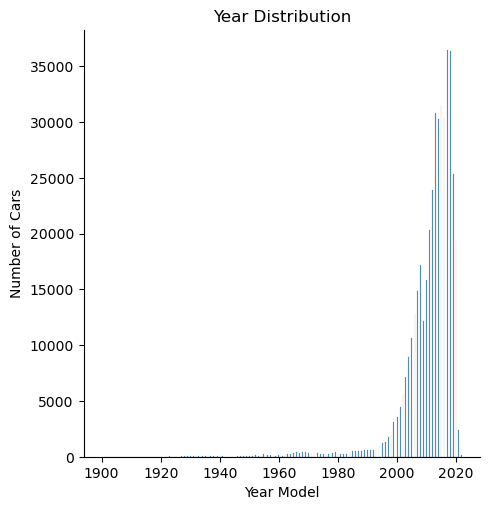

In [21]:
sns.displot(df['year']).set(title='Year Distribution', xlabel='Year Model', ylabel='Number of Cars')

The year model should be more appropriate as an integer and it may be bes to reclassify this as the 'age' of the car to have a better scaling with relation to other values. Also, there is 1% missing values for this feature which should be imputable without major concern for introducing strong bias

In [22]:
np.log10(2024 - df['year']).describe()

count    425675.000000
mean          1.030006
std           0.244319
min           0.301030
25%           0.845098
50%           1.041393
75%           1.204120
max           2.093422
Name: year, dtype: float64

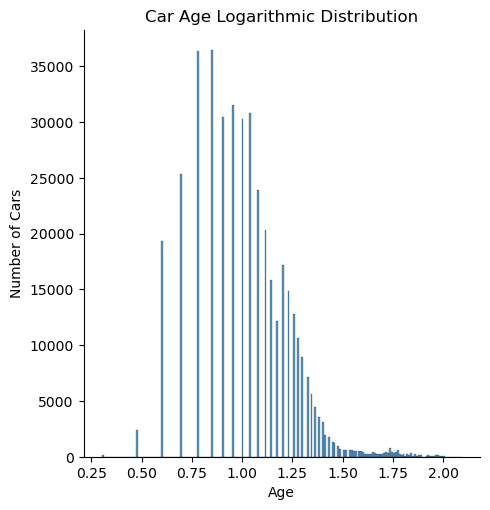

In [259]:
sns.displot(np.log10(2024 - df['year'])).\
set(title='Car Age Logarithmic Distribution', xlabel='Age', ylabel='Number of Cars')

**ODOMETER**

In [24]:
df['odometer'].value_counts().sort_index()

odometer
0.0           1965
1.0           2246
2.0            153
3.0             58
4.0            138
              ... 
9099999.0        1
9750924.0        1
9876543.0        1
9999999.0       88
10000000.0      50
Name: count, Length: 104870, dtype: int64

This feature is also expected to have a high correlation with the price. As this is a continuous variable, it may be used as is otherwise it could be reclassified per milage range (i.e. 25K, 50K, 100K, 150K, 200K+). There is a 1% missing data for this feature so there should be no problem to impute it without any concern for introducing strong bias. There are 0 values which may present a problem if applying logarithmic transformation and those values may have to be reset to 1

In [25]:
df['odometer'].describe()

count    4.224800e+05
mean     9.804333e+04
std      2.138815e+05
min      0.000000e+00
25%      3.770400e+04
50%      8.554800e+04
75%      1.335425e+05
max      1.000000e+07
Name: odometer, dtype: float64

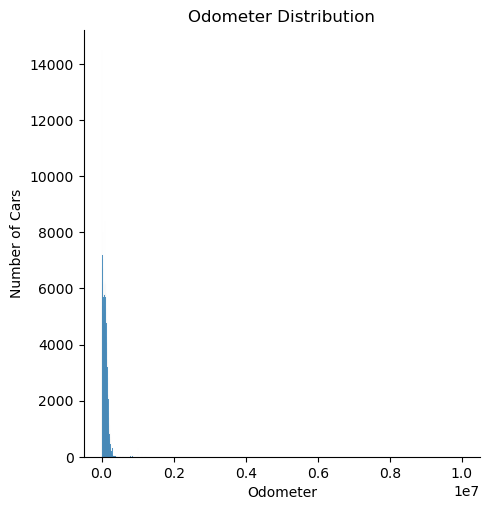

In [26]:
sns.displot(df['odometer']).set(title='Odometer Distribution', xlabel='Odometer', ylabel='Number of Cars')

The 'odometer' distribution is very skewed so it may be necessary to remove outliers or apply a logarithmic transformation

In [27]:
np.log10(df['odometer']).describe()

count    4.224800e+05
mean             -inf
std               NaN
min              -inf
25%      4.576387e+00
50%      4.932210e+00
75%      5.125620e+00
max      7.000000e+00
Name: odometer, dtype: float64

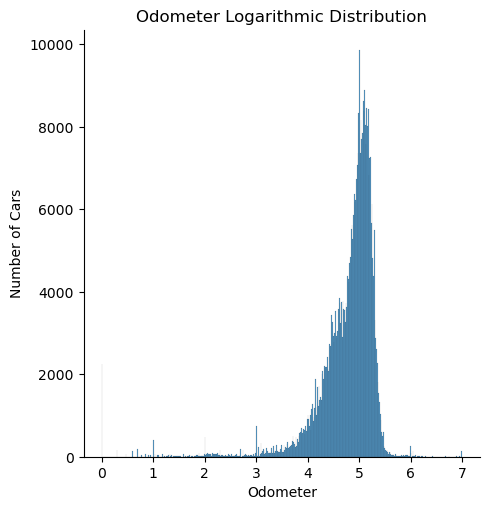

In [262]:
sns.displot(np.log10(df['odometer'])).\
set(title='Odometer Logarithmic Distribution', xlabel='Odometer', ylabel='Number of Cars')

Evaluating correlation plot between numeric features and target variable

Text(0.5, 1.02, 'Correlation Numeric Features')

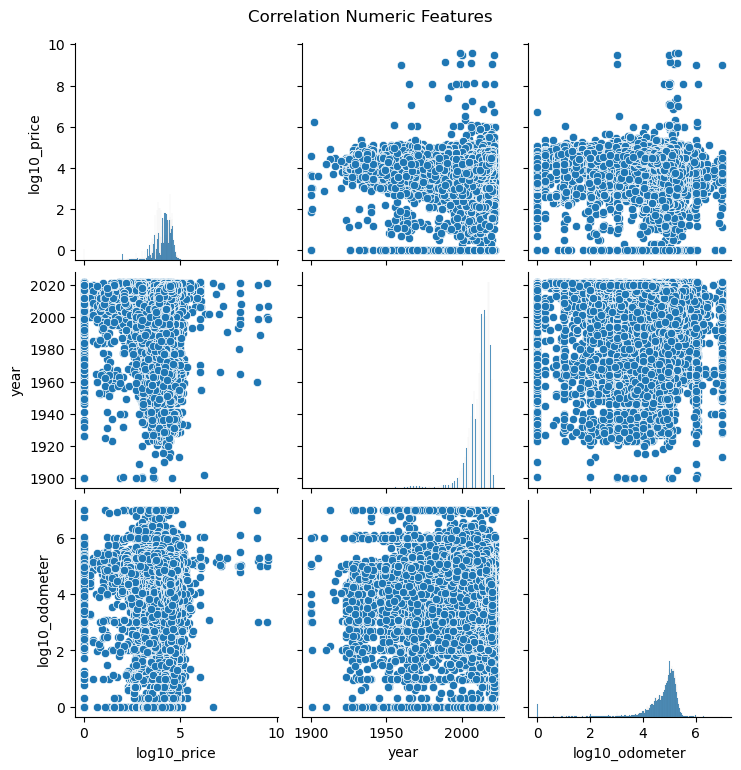

In [100]:
df_plot = pd.DataFrame({'log10_price':np.log10(df['price']),\
                        'year':df['year'],\
                        'log10_odometer':np.log10(df['odometer'])})
df_fig = sns.pairplot(df_plot)
df_fig.fig.suptitle('Correlation Numeric Features', y=1.02)

Evaluating the implication of dropping NaN values for multiple features that could be considered critical

In [29]:
condition_type_missing = len(df.query('(condition.isna()) | (condition.notna() & type.isna())'))
print('Condition & Type')
print('\tCombined missing data:',round((condition_type_missing)/len(df)*100,2),'%')

Condition & Type
	Combined missing data: 48.46 %


This is a very high percentage of data loss if wanting to preserve those two features but considering 'condition' alone is 40%, the extra loss preserving 'type' should be less significant. Common sense and industry experts would agree that the condition and the type of vehicle should have a very strong correlation with the price

### 3. Evaluating target variable

In [30]:
df['price'].value_counts().sort_index()

price
0             32895
1              1951
2                13
3                 9
4                 4
              ...  
1234567890        1
1410065407        1
3009548743        1
3024942282        2
3736928711        2
Name: count, Length: 15655, dtype: int64

The value distribution for the target variable seems skewed and it contains 0 values which may be a problem if applying logarithmic transformation. Those values may need to be reset to 1

In [31]:
df['price'].describe()

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

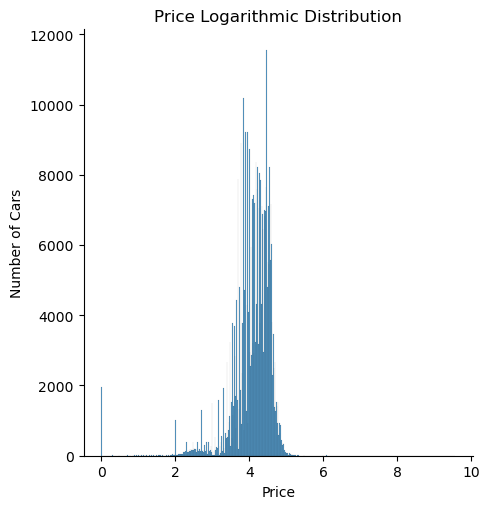

In [263]:
sns.displot(np.log10(df['price'])).\
set(title='Price Logarithmic Distribution', xlabel='Price', ylabel='Number of Cars')

## Data Preparation

After the initial exploration and fine tuning of the business understanding, it is time to construct the final dataset prior to modeling.  Here, it is important to handle any integrity issues and cleaning, the engineering of new features, any transformations that should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling. 

### 1. Dataset processing

In [ ]:
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder

Dropping columns deemed unnecessary or inadequate

In [36]:
drop_columns = ['id','region','model','cylinders','VIN','drive','size','paint_color','state']
df_clean = df.drop(columns=drop_columns)

Renaming 'title_status'

In [37]:
df_clean.rename(columns={'title_status':'title'}, inplace=True)

Dropping NaN values for features considered critical. This would be an initial step for a Multiple Imputation process

In [38]:
df_clean.dropna(subset=['condition','type'], inplace=True)

Filling in missing values for the remaining features

In [39]:
df_clean.ffill(inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220001 entries, 27 to 426879
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         220001 non-null  int64  
 1   year          220001 non-null  float64
 2   manufacturer  220001 non-null  object 
 3   condition     220001 non-null  object 
 4   fuel          220001 non-null  object 
 5   odometer      220001 non-null  float64
 6   title         220001 non-null  object 
 7   transmission  220001 non-null  object 
 8   type          220001 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 16.8+ MB


Converting 'year' model to 'age'

In [40]:
df_clean['age'] = (2024 - df_clean['year']).astype(int)
df_clean.drop(columns=['year'], inplace=True)

Aggregating 'manufacturer' values into the worlds region where the brand is originally from

In [41]:
brand = {'usa':['ford','chevrolet','jeep','gmc','ram','dodge','cadillac','buick','chrysler','lincoln',\
                'pontiac','mercury','tesla','saturn','harley-davidson'],
         'jap':['toyota','honda','nissan','lexus','subaru','acura','infiniti','mazda','mitsubishi','datsun'],
         'eur':['bmw','mercedes-benz','volkswagen','audi','volvo','jaguar','mini','rover','alfa-romeo',\
                'porsche','fiat','ferrari','aston-martin','land rover','morgan'],
         'kor':['hyundai','kia'],}
df_clean['brand'] = df_clean['manufacturer'].apply(lambda x: 'usa' if x in brand['usa'] else \
                                                            ('jap' if x in brand['jap'] else \
                                                            ('eur' if x in brand['eur'] else \
                                                            ('kor' if x in brand['kor'] else None))))
df_clean.drop(columns='manufacturer', inplace=True)

Transforing 'odometer' to logarithmic values

In [42]:
df_clean['odometer'] = df_clean['odometer'].apply(lambda x: 0 if x <= 1 else np.log10(x))
Q1 = df_clean['odometer'].quantile(0.25)
Q3 = df_clean['odometer'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
df_clean = df_clean.query('(odometer >= @lower_limit) & (odometer <= @upper_limit)')
df_clean['odometer'].describe()

count    212089.000000
mean          4.812925
std           0.402387
min           3.569374
25%           4.542340
50%           4.911977
75%           5.122949
max           6.039811
Name: odometer, dtype: float64

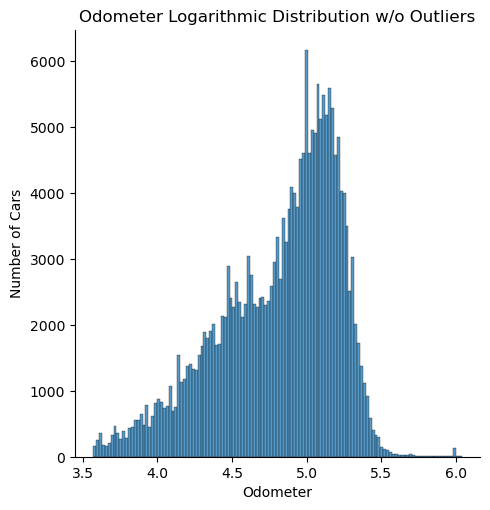

In [43]:
sns.displot(df_clean['odometer']).\
set(title='Odometer Logarithmic Distribution w/o Outliers', xlabel='Odometer', ylabel='Number of Cars') 

### 2 . Processing target variable

Changing price to integer value

In [47]:
df_clean['price'] = df_clean['price'].astype(int)

Given the distribution, the target variable will be transformed log10
Replacing values 0 for 1 to prevent infinite results with the logarithmic transformation of the target variable

In [48]:
df_clean['price'] = df_clean['price'].apply(lambda x: 0 if x <= 1 else np.log10(x))

Removing outliers

In [49]:
Q1 = df_clean['price'].quantile(0.25)
Q3 = df_clean['price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
df_clean = df_clean.query('(price >= @lower_limit) & (price <= @upper_limit)')
df_clean['price'].describe()

count    200056.000000
mean          4.148067
std           0.362455
min           2.951823
25%           3.900367
50%           4.204066
75%           4.447003
max           5.311752
Name: price, dtype: float64

Evaluating target variable transformation

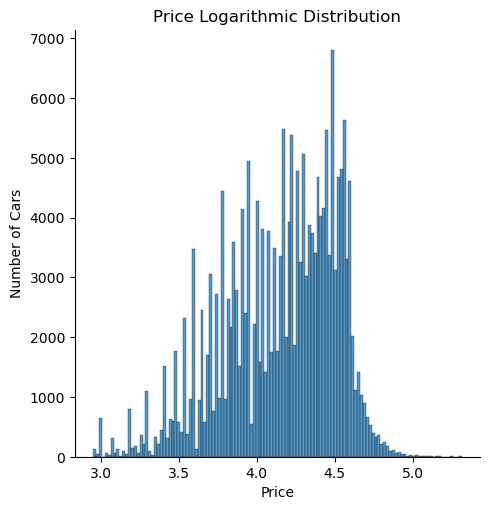

In [50]:
sns.displot(df_clean['price']).\
set(title='Price Logarithmic Distribution', xlabel='Price', ylabel='Number of Cars')

### 3. Feature Engineering

List of categorical features for Ordinal Encoding

In [323]:
ore_features = ['condition']

List of remaining categorical features for OneHotEncoding 

In [324]:
df_clean.rename(columns={'title_status':'title'}, inplace=True)
ohe_features = ['brand','fuel','title','transmission','type']

List of numeric features for Scaling

In [325]:
num_features = ['age','odometer']

Instantiating the column transformer for feature engineering

In [326]:
FeatureEngineering = make_column_transformer(
    (OrdinalEncoder(), ore_features),
    (OneHotEncoder(sparse_output=False, drop="if_binary"), ohe_features),
    (StandardScaler(), num_features),
    remainder="passthrough",
    verbose_feature_names_out=False,
)
FeatureEngineering

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 ['condition']),
                                ('onehotencoder',
                                 OneHotEncoder(drop='if_binary',
                                               sparse_output=False),
                                 ['brand', 'fuel', 'title', 'transmission',
                                  'type']),
                                ('standardscaler', StandardScaler(),
                                 ['age', 'odometer'])],
                  verbose_feature_names_out=False)

Evaluating column transformer

In [327]:
df_transformed = pd.DataFrame(FeatureEngineering.fit_transform(df_clean), \
                              columns=FeatureEngineering.get_feature_names_out())
df_transformed.head()

,condition,brand_eur,brand_jap,brand_kor,brand_usa,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,...,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,age,odometer,price
0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.314525,-0.121738,4.526210
1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.133314,0.099677,4.353916
2,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.986282,-1.306296,4.597586
3,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.650403,-0.488494,4.491222
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.202565,0.727275,4.176091


Evaluating **Correlation Matrix** with all features transformed

In [328]:
df_transformed.corr()['price'].sort_values(ascending=False)

price                     1.000000
transmission_other        0.479568
fuel_other                0.252768
type_pickup               0.211810
type_other                0.190891
condition                 0.149177
fuel_diesel               0.135049
brand_eur                 0.104901
type_truck                0.087653
title_clean               0.084534
fuel_electric             0.042494
type_coupe                0.038574
brand_usa                 0.038185
title_lien                0.015325
type_bus                 -0.003450
type_convertible         -0.004304
type_offroad             -0.006318
type_van                 -0.009362
fuel_hybrid              -0.013404
title_parts only         -0.028753
type_hatchback           -0.034389
type_wagon               -0.042864
title_rebuilt            -0.050235
title_missing            -0.058536
brand_kor                -0.071120
type_SUV                 -0.072389
title_salvage            -0.076535
brand_jap                -0.094230
type_mini-van       

Evaluating **Heatmap** with all the features transformed

[Text(0.5, 1.0, 'Heatmap after Feature Engineering')]

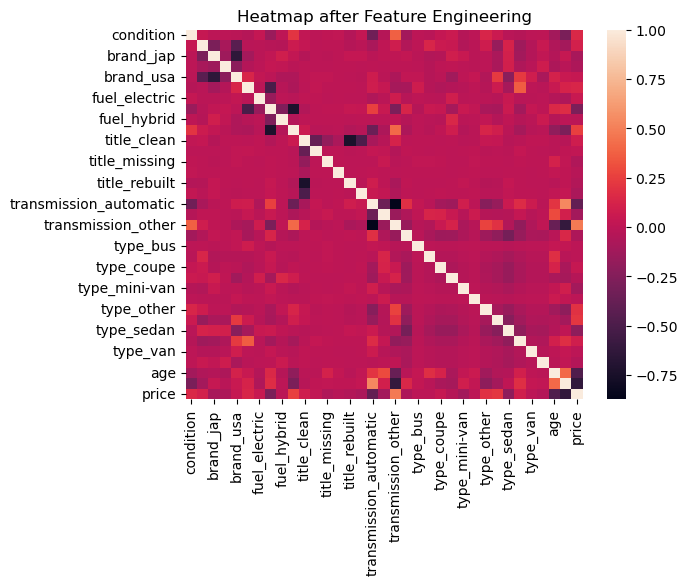

In [329]:
sns.heatmap(df_transformed.corr()).set(title='Heatmap after Feature Engineering')

Evaluating distribution for all the features transformed

In [330]:
df_transformed.describe()

,condition,brand_eur,brand_jap,brand_kor,brand_usa,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,...,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,age,odometer,price
count,200056.000000,200056.000000,200056.000000,200056.000000,200056.000000,200056.000000,200056.000000,200056.000000,200056.000000,200056.000000,...,200056.000000,200056.000000,200056.000000,200056.000000,200056.000000,200056.000000,200056.000000,2.000560e+05,2.000560e+05,200056.000000
mean,1.300541,0.161160,0.292013,0.045472,0.501355,0.049331,0.005169,0.835831,0.014396,0.095273,...,0.002649,0.064052,0.127909,0.271259,0.095883,0.023468,0.028412,2.891099e-17,-2.639638e-15,4.148067
std,1.071811,0.367679,0.454689,0.208338,0.499999,0.216559,0.071707,0.370430,0.119117,0.293593,...,0.051403,0.244846,0.333989,0.444611,0.294432,0.151386,0.166147,1.000002e+00,1.000002e+00,0.362455
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.210201e+00,-3.064243e+00,2.951823
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.504033e-01,-6.763350e-01,3.900367
50%,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.025650e-01,2.504587e-01,4.204066
75%,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.572330e-01,7.740794e-01,4.447003
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.244887e+01,3.026591e+00,5.311752


Evaluating a pair plot between all the transformed variables as numeric was not possible due to the magnitude of the feature set after engineering

## Modeling

With a clean dataset, it is time to build and test some models. A number of different regression models should be evaluated with the price as the target.  In building the models, different hyperparameters should tested and the findings should be cross-validate.

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, ShuffleSplit, KFold, LeaveOneOut, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error
import scipy as sp

### 1. Train / Test data separation

Splitting cleaned dataset for modeling when FeatureEngineering (FE) and TransformedTargetRegressor (TTR) is included in the model's pipeline but due to extended processing time during grid search, pre-transformed dataset was used and FE and TTR omitted from the models' pipelines

In [101]:
#X = df_clean.drop(columns=['price'])
#y = df_clean['price']
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

Splitting transformed cleaned dataset with FeatureEngineering column transformed when not using TransformedTargetRegressor

In [106]:
X = df_transformed.drop(columns=['price'])
y = df_transformed['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

### 2. Linear Regression Modeling

Instantiating Linear Regression model pipeline. FeatureEngineering and TransformedTargetRegressor were omitted and pre-run on the data set due to lengthy processing time

In [120]:
#lnreg_pipe = Pipeline([
#                        ('feateng',FeatureEngineering),
#                        ('polyfeat',PolynomialFeatures(include_bias=False)),                        
#                        ('lnreg',TransformedTargetRegressor(\
#                                                             regressor=LinearRegression(),
#                                                             func=np.log10,
#                                                             inverse_func=sp.special.exp10),)
#                       ])

lnreg_pipe = Pipeline([('polyfeat',PolynomialFeatures(include_bias=False)),
                       ('lnreg',LinearRegression(),)
                      ])

Instantiating GridSearch for Linear Regression model

In [121]:
params = {'polyfeat__degree':[1,2]}
lnreg_selector = GridSearchCV(estimator=lnreg_pipe,
                              param_grid=params,
                              scoring='neg_mean_squared_error',
                              cv=ShuffleSplit(n_splits=2, test_size=0.8, random_state=42))

Performing grid search for best model hyperparameters

In [122]:
lnreg_selector.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=2, random_state=42, test_size=0.8, train_size=None),
             estimator=Pipeline(steps=[('polyfeat',
                                        PolynomialFeatures(include_bias=False)),
                                       ('lnreg', LinearRegression())]),
             param_grid={'polyfeat__degree': [1, 2]},
             scoring='neg_mean_squared_error')

Selecting best model

In [125]:
lnreg_model = lnreg_model_selector.best_estimator_

Identifying the best hyperparameters from the grid search

In [126]:
lnreg_params = lnreg_selector.best_params_
lnreg_params

{'polyfeat__degree': 1}

Getting best model coefficients. Updated for module pipeline without FE & TTR

In [255]:
#lnreg_coefs = pd.DataFrame(lnreg_model.named_steps['lnreg'].regressor_.coef_,
#                           index=[lnreg_model.named_steps['polyfeat'].get_feature_names_out()],
#                           columns=['COEF']).sort_values(by=['COEF'], ascending=False)

lnreg_coefs = pd.DataFrame(lnreg_model.named_steps['lnreg'].coef_, 
                           index=[lnreg_model.named_steps['polyfeat'].get_feature_names_out()],
                           columns=['COEF'])
lnreg_coefs.sort_values(by=['COEF'], ascending=False)

,COEF
title_lien,7.673991e+08
title_clean,7.673991e+08
title_rebuilt,7.673991e+08
title_salvage,7.673991e+08
title_missing,7.673991e+08
title_parts only,7.673991e+08
transmission_other,6.001005e+08
transmission_manual,6.001005e+08
transmission_automatic,6.001005e+08
type_truck,5.441282e+08


Evaluating the best model **R2 score**

In [310]:
lnreg_r2 = lnreg_model.score(X_test,y_test)
lnreg_r2

0.601639542027791

Evaluating the best model **RMSE**

In [232]:
lnreg_rmse = np.sqrt(mean_squared_error(y_test,lnreg_best_model.predict(X_test)))
lnreg_rmse

0.22822941295441865

Evaluating the best model **MAE**

In [140]:
lnreg_mae = mean_absolute_error(y_test,lnreg_best_model.predict(X_test))
lnreg_mae

0.1671305057720717

Evaluating **Feature Permutation Importance**

In [141]:
lnreg_fpi = permutation_importance(lnreg_model, X_train, y_train, n_repeats=25, random_state=42)

In [317]:
lnreg_imp = pd.DataFrame({'MEAN':lnreg_fpi['importances_mean'],'STD':lnreg_fpi['importances_std']}, 
                              index=X_train.columns)
lnreg_imp.sort_values(by=['MEAN'],ascending=False)

,MEAN,STD
transmission_automatic,1.206287e+18,2.896367e+15
transmission_other,1.081211e+18,2.531740e+15
type_sedan,8.906442e+17,2.456850e+15
type_SUV,7.461129e+17,2.003564e+15
type_pickup,5.011203e+17,9.853185e+14
type_truck,3.911688e+17,1.182034e+15
fuel_gas,3.309515e+17,7.734952e+14
title_clean,3.221836e+17,7.341719e+14
transmission_manual,2.942404e+17,5.605019e+14
type_coupe,2.790288e+17,6.464445e+14


Instantiating **Recursive Feature Elimination (RFE)** pipeline

In [160]:
params = {'selector__n_features_to_select':[5,10,15,20]}
lnreg_rfe = Pipeline([('selector', RFE(estimator=LinearRegression())),
                      ('model', LinearRegression())])

Instantiating grid search for RFE

In [161]:
lnreg_rfe_selector = GridSearchCV(estimator=lnreg_rfe, param_grid=params)

Performing grid search for RFE

In [162]:
lnreg_rfe_selector.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('selector',
                                        RFE(estimator=LinearRegression())),
                                       ('model', LinearRegression())]),
             param_grid={'selector__n_features_to_select': [5, 10, 15, 20]})

Identifying the best hyperparameters from the grid search

In [163]:
lnreg_rfe_selector.best_params_

{'selector__n_features_to_select': 20}

Getting selected features

In [164]:
lnreg_rfe_features = lnreg_rfe_selector.best_estimator_.named_steps['selector'].get_feature_names_out().tolist()
lnreg_rfe_features

['brand_eur',
 'brand_jap',
 'brand_kor',
 'brand_usa',
 'fuel_diesel',
 'fuel_electric',
 'fuel_gas',
 'fuel_hybrid',
 'fuel_other',
 'transmission_automatic',
 'transmission_manual',
 'transmission_other',
 'type_SUV',
 'type_convertible',
 'type_coupe',
 'type_offroad',
 'type_other',
 'type_pickup',
 'type_truck',
 'type_van']

Getting predictions with RFE features for performance evaluation

In [ ]:
lnreg_rfe_pred = LinearRegression().fit(X_train[lnreg_rfe_features],y_train).predict(X_test[lnreg_rfe_features])

Evaluating **RMSE** for best model with **RFE** selected features

In [271]:
print(f'RFE: {np.sqrt(mean_squared_error(y_test,lnreg_rfe_pred))}\nALL: {lnreg_rmse}')

RFE: 0.29266143100378705
ALL: 0.22822941295441865


Evaluating **MAE** for best model with **RFE** selected features

In [272]:
print(f'RFE: {mean_absolute_error(y_test,lnreg_rfe_pred)}\nALL: {lnreg_mae}')

RFE: 0.22322773783520883
ALL: 0.1671305057720717


Instantiating **Sequential Feature Selection (SFS)** pipeline. Limiting to max 15 features selection due to processing time

In [168]:
params = {'selector__n_features_to_select':[5,10,15]}
lnreg_sfs = Pipeline([('selector', SequentialFeatureSelector(estimator=LinearRegression())),
                      ('model', LinearRegression())])

Instantiating grid search for SFS

In [169]:
lnreg_sfs_selector = GridSearchCV(estimator=lnreg_sfs,param_grid=params)

Performing grid search for SFS

In [170]:
lnreg_sfs_selector.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('selector',
                                        SequentialFeatureSelector(estimator=LinearRegression())),
                                       ('model', LinearRegression())]),
             param_grid={'selector__n_features_to_select': [5, 10, 15]})

Identifying the best hyperparameters from the grid search

In [177]:
lnreg_sfs_selector.best_params_

{'selector__n_features_to_select': 15}

Getting selected features

In [178]:
lnreg_sfs_features = lnreg_sfs_selector.best_estimator_.named_steps['selector'].get_feature_names_out().tolist()
lnreg_sfs_features

['condition',
 'brand_eur',
 'brand_kor',
 'fuel_diesel',
 'fuel_gas',
 'title_clean',
 'transmission_other',
 'type_hatchback',
 'type_mini-van',
 'type_pickup',
 'type_sedan',
 'type_truck',
 'type_wagon',
 'age',
 'odometer']

Getting predictions with SFS features for performance evaluation

In [273]:
lnreg_sfs_pred = LinearRegression().fit(X_train[lnreg_sfs_features],y_train).predict(X_test[lnreg_sfs_features])

Evaluating **RMSE** for best model with **SFS** selected features

In [277]:
print(f'SFS: {np.sqrt(mean_squared_error(y_test,lnreg_sfs_pred))}\nALL: {lnreg_rmse}')

SFS: 0.2289922933454857
ALL: 0.22822941295441865


Evaluating **MAE** for best model with **SFS** selected features

In [278]:
print(f'SFS: {mean_absolute_error(y_test,lnreg_sfs_pred)}\nALL: {lnreg_mae}')

SFS: 0.1679528992604797
ALL: 0.1671305057720717


### 3. Ridge Regression Modeling

Instantiating Ridge Regression model pipeline. FeatureEngineering and TransformedTargetRegressor were omitted and pre-run on the data set due to lengthy processing time

In [189]:
#ridge_model = Pipeline([('feateng',FeatureEngineering),
#                        ('polyfeat',PolynomialFeatures(include_bias=False)),
#                        ('ridge',TransformedTargetRegressor(\
#                                                            regressor=Ridge(),
#                                                            func=np.log10, 
#                                                            inverse_func=sp.special.exp10),
#                        ('ridge',Ridge()),
#                       ])

ridge_pipe = Pipeline([('polyfeat',PolynomialFeatures(include_bias=False)),
                       ('ridge',Ridge()),
                      ])

Instantiating GridSearch for Ridge Regression model

In [298]:
params = {'polyfeat__degree':[1,2],'ridge__alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
ridge_selector = GridSearchCV(estimator=ridge_pipe,
                                    param_grid=params,
                                    scoring='neg_mean_squared_error',
                                    cv=ShuffleSplit(n_splits=2, test_size=0.8, random_state=42))

Performing grid search for the best model hyperparameters

In [299]:
ridge_selector.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=2, random_state=42, test_size=0.8, train_size=None),
             estimator=Pipeline(steps=[('polyfeat',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ridge', Ridge())]),
             param_grid={'polyfeat__degree': [1, 2],
                         'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

Selecting best model

In [300]:
ridge_model = ridge_selector.best_estimator_

Identifying the best hyperparameters from the grid search

In [301]:
ridge_params = ridge_selector.best_params_
ridge_params

{'polyfeat__degree': 2, 'ridge__alpha': 10}

Getting best model coefficients. Updated for module pipeline without FE & TTR

In [314]:
#ridge_coefs = pd.DataFrame(ridge_model.named_steps['ridge'].regressor_.coef_,
#                           index=[ridge_model.named_steps['polyfeat'].get_feature_names_out()],
#                           columns=['COEF']).sort_values(by=['COEF'], ascending=False)

ridge_coefs = pd.DataFrame(ridge_model.named_steps['ridge'].coef_, 
                           index=[ridge_model.named_steps['polyfeat'].get_feature_names_out()],
                           columns=['COEF'])
ridge_coefs.sort_values(by=['COEF'], ascending=False).head(20)

,COEF
transmission_manual type_van,0.177918
brand_eur type_bus,0.145549
fuel_diesel type_mini-van,0.135854
fuel_other title_clean,0.119895
fuel_diesel title_missing,0.113540
fuel_electric type_sedan,0.110930
fuel_electric type_SUV,0.095762
fuel_gas type_bus,0.090110
fuel_diesel type_van,0.087377
brand_usa fuel_electric,0.085733


Evaluating the best model **R2 score**

In [311]:
ridge_r2 = ridge_model.score(X_test, y_test)
ridge_r2

0.7300297300189158

Evaluating the best model **RMSE**

In [304]:
ridge_rmse = np.sqrt(mean_squared_error(y_test,ridge_model.predict(X_test)))
ridge_rmse

0.18788472441678095

Evaluating the best model **MAE**

In [305]:
ridge_mae = mean_absolute_error(y_test,ridge_model.predict(X_test))
ridge_mae

0.12957812951092512

Evaluating **Feature Permutation Importance**

In [307]:
ridge_fpi = permutation_importance(ridge_model, X_train, y_train, n_repeats=25, random_state=42)

In [308]:
ridge_imp = pd.DataFrame({'MEAN':ridge_fpi['importances_mean'],'STD':ridge_fpi['importances_std']},
                         index=X_train.columns)
ridge_imp.sort_values(by=['MEAN'],ascending=False)

,MEAN,STD
age,0.357171,0.001574
odometer,0.271830,0.001227
type_sedan,0.080343,0.000691
type_truck,0.049666,0.000385
type_hatchback,0.033371,0.000311
transmission_automatic,0.029586,0.000601
type_pickup,0.029300,0.000401
condition,0.020377,0.000285
title_clean,0.019242,0.000291
fuel_diesel,0.017042,0.000204


Instantiating **Recursive Feature Elimination (RFE)** pipeline

In [214]:
params = {'selector__n_features_to_select':[5,10,15,20]}
ridge_rfe = Pipeline([('selector', RFE(estimator=Ridge(alpha=10))),
                      ('model', Ridge(alpha=10))])

Instantiating grid search for RFE

In [215]:
ridge_rfe_selector = GridSearchCV(estimator=ridge_rfe,param_grid=params)

Performing grid search for RFE

In [216]:
ridge_rfe_selector.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('selector',
                                        RFE(estimator=Ridge(alpha=10))),
                                       ('model', Ridge(alpha=10))]),
             param_grid={'selector__n_features_to_select': [5, 10, 15, 20]})

Identifying the best hyperparameters from the grid search

In [219]:
ridge_rfe_selector.best_params_

{'selector__n_features_to_select': 20}

Getting selected features

In [218]:
ridge_rfe_features = ridge_rfe_selector.best_estimator_.named_steps['selector'].get_feature_names_out().tolist()
ridge_rfe_features

['brand_eur',
 'brand_kor',
 'fuel_diesel',
 'fuel_gas',
 'fuel_hybrid',
 'title_clean',
 'title_lien',
 'title_missing',
 'title_parts only',
 'title_rebuilt',
 'transmission_other',
 'type_hatchback',
 'type_mini-van',
 'type_offroad',
 'type_pickup',
 'type_sedan',
 'type_truck',
 'type_wagon',
 'age',
 'odometer']

Getting predictions with RFE features for performance evaluation

In [279]:
ridge_rfe_pred = Ridge(alpha=10).fit(X_train[ridge_rfe_features],y_train).predict(X_test[ridge_rfe_features])

Evaluating **RMSE** for best model with **RFE** selected features

In [280]:
print(f'RFE: {np.sqrt(mean_squared_error(y_test,ridge_rfe_pred))}\nALL: {ridge_rmse}')

RFE: 0.22953741621991938
ALL: 0.18788472441678095


Evaluating **MAE** for best model with **RFE** selected features

In [281]:
print(f'RFE: {mean_absolute_error(y_test,ridge_rfe_pred)}\nALL: {ridge_mae}')

RFE: 0.16773153771783728
ALL: 0.12957812951092512


Instantiating **Sequential Feature Selection (SFS)** pipeline. Limiting to max 15 features selection due to processing time

In [222]:
params = {'selector__n_features_to_select':[5,10,15]}
ridge_sfs = Pipeline([('selector', SequentialFeatureSelector(estimator=Ridge(alpha=10))),
                      ('model', Ridge(alpha=10))])

Instantiating grid search for SFS

In [223]:
ridge_sfs_selector = GridSearchCV(estimator=ridge_sfs,param_grid=params)

Performing grid search for SFS

In [224]:
ridge_sfs_selector.fit(X_trans,y_trans)

GridSearchCV(estimator=Pipeline(steps=[('selector',
                                        SequentialFeatureSelector(estimator=Ridge(alpha=10))),
                                       ('model', Ridge(alpha=10))]),
             param_grid={'selector__n_features_to_select': [5, 10, 15]})

Identifying the best hyperparameters from the grid search

In [225]:
ridge_sfs_selector.best_params_

{'selector__n_features_to_select': 15}

Getting selected features

In [226]:
ridge_sfs_features = ridge_sfs_selector.best_estimator_.named_steps['selector'].get_feature_names_out().tolist()
ridge_sfs_features

['condition',
 'brand_eur',
 'brand_kor',
 'fuel_diesel',
 'fuel_gas',
 'title_clean',
 'transmission_other',
 'type_hatchback',
 'type_mini-van',
 'type_pickup',
 'type_sedan',
 'type_truck',
 'type_wagon',
 'age',
 'odometer']

Getting predictions with SFS features for performance evaluation

In [283]:
ridge_sfs_pred = Ridge(alpha=10).fit(X_train[ridge_sfs_features],y_train).predict(X_test[ridge_sfs_features])

Evaluating **RMSE** for best model with **SFS** selected features

In [284]:
print(f'SFS: {np.sqrt(mean_squared_error(y_test,ridge_sfs_pred))}\nALL: {ridge_rmse}')

SFS: 0.22899261381499791
ALL: 0.18788472441678095


Evaluating **MAE** for best model with **SFS** selected features

In [285]:
print(f'SFS: {mean_absolute_error(y_test, ridge_sfs_pred)}\nALL: {ridge_mae}')

SFS: 0.16795458404603114
ALL: 0.12957812951092512


### 4. Lasso Modeling

Instantiating Lasso Regression model pipeline. FeatureEngineering and TransformedTargetRegressor were omitted and pre-run on the data set due to lengthy processing time

In [234]:
#lasso_pipe = Pipeline([('feateng',FeatureEngineering),
#                       ('polyfeat',PolynomialFeatures(include_bias=False)),
#                       ('lasso',TransformedTargetRegressor(\
#                                                           regressor=Lasso(),
#                                                           func=np.log10, 
#                                                           inverse_func=sp.special.exp10),
#                      ])

lasso_pipe = Pipeline([('polyfeat',PolynomialFeatures(include_bias=False)),
                       ('lasso',Lasso())
                      ])

Instantiating GridSearch for Lasso Regression model

In [235]:
params = {'polyfeat__degree':[1,2],'lasso__alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lasso_selector = GridSearchCV(estimator=lasso_pipe,
                                    param_grid=params,
                                    scoring='neg_mean_squared_error',
                                    cv=ShuffleSplit(n_splits=2, test_size=0.8, random_state=42))

Performing grid search for the best model hyperparameters

In [236]:
lasso_selector.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=2, random_state=42, test_size=0.8, train_size=None),
             estimator=Pipeline(steps=[('polyfeat',
                                        PolynomialFeatures(include_bias=False)),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'polyfeat__degree': [1, 2]},
             scoring='neg_mean_squared_error')

Selecting best model

In [237]:
lasso_model = lasso_selector.best_estimator_

Identifying the best hyperparameters for the grid search

In [238]:
lasso_params = lasso_selector.best_params_
lasso_params

{'lasso__alpha': 0.001, 'polyfeat__degree': 2}

Getting best model coefficients. Updated for module pipeline without FE & TTR

In [253]:
#lasso_coefs = pd.DataFrame(lasso_model.named_steps['lasso'].regressor_.coef_, 
#                           index=[lasso_model.named_steps['polyfeat'].get_feature_names_out()],
#                           columns=['COEF']).sort_values(by=['COEF'], ascending=False)

lasso_coefs = pd.DataFrame(lasso_model.named_steps['lasso'].coef_, 
                           index=[lasso_model.named_steps['polyfeat'].get_feature_names_out()],
                           columns=['COEF'])
lasso_coefs.sort_values(by=['COEF'], ascending=False)

,COEF
type_truck^2,0.113115
transmission_automatic type_pickup,0.090225
brand_usa fuel_diesel,0.061059
transmission_automatic type_truck,0.041115
condition transmission_other,0.041109
...,...
type_coupe odometer,-0.046695
title_clean type_mini-van,-0.051453
type_sedan,-0.077705
type_hatchback^2,-0.159355


Identifying Lasso feature elimination

In [246]:
lasso_coefs.query('COEF == 0')

,COEF
brand_eur,0.0
brand_jap,-0.0
brand_usa,0.0
fuel_electric,0.0
fuel_hybrid,-0.0
...,...
type_van type_wagon,0.0
type_van age,-0.0
type_van odometer,0.0
type_wagon age,0.0


Evaluating the best model **R2 score**

In [312]:
lasso_r2 = lasso_model.score(X_test,y_test)
lasso_r2

0.7151231131369691

Evaluating the best model **RMSE**

In [248]:
lasso_rmse = np.sqrt(mean_squared_error(y_test,lasso_model.predict(X_test)))
lasso_rmse

0.19300213314391618

Evaluating the best model **MAE**

In [249]:
lasso_mae = mean_absolute_error(y_test,lasso_model.predict(X_test))
lasso_mae

0.13484710541079808

Evaluating Feature Permutation Importance

In [251]:
lasso_fpi = permutation_importance(lasso_model, X_train, y_train, n_repeats=25, random_state=42)

In [319]:
lasso_imp = pd.DataFrame({'MEAN':lasso_fpi['importances_mean'],'STD':lasso_fpi['importances_std']},
                              index=X_train.columns)
lasso_imp.sort_values(by=['MEAN'],ascending=False)

,MEAN,STD
age,0.358878,0.001571
odometer,0.287278,0.001225
type_sedan,0.060807,0.000574
type_truck,0.047231,0.000426
type_pickup,0.026990,0.000367
type_hatchback,0.025867,0.000252
condition,0.022310,0.000286
transmission_other,0.016922,0.000204
transmission_automatic,0.015854,0.000317
fuel_diesel,0.015465,0.000199


## Evaluation

After some modeling has been accomplished, the objective is to reflect on what has been identified as a high quality model and what can be learned from this. The business objective should be reviewed and explore how to provide meaningful insight on drivers of used car prices.  The goal now is to distill the findings and determine whether the earlier phases need revisitation and adjustment or if there is enough information of value to bring back to the client.

### 1. Comparing modeling performance

In [313]:
modules_performance = pd.DataFrame({'RMSE':[lnreg_rmse,ridge_rmse,lasso_rmse],\
                                    'MAE':[lnreg_mae,ridge_mae,lasso_mae],\
                                    'R2':[lnreg_r2,ridge_r2,lasso_r2],\
                                    'Params':[lnreg_params,ridge_params,lasso_params]},\
                                    columns=['RMSE','MAE','R2','Params'],\
                                    index=['Linear Regression','Ridge Regression','Lasso Regression'])
modules_performance.sort_values(by=['RMSE','MAE','R2'])

,RMSE,MAE,R2,Params
Ridge Regression,0.187885,0.129578,0.730030,"{'polyfeat__degree': 2, 'ridge__alpha': 10}"
Lasso Regression,0.193002,0.134847,0.715123,"{'lasso__alpha': 0.001, 'polyfeat__degree': 2}"
Linear Regression,0.228229,0.167131,0.601640,{'polyfeat__degree': 1}


Based on the above comparison, it seems like the best performance is for **Ridge Regression Model** with **alpha=10** and **Polynomial Features** with **degree=2** therefore any insight and recommendations should be based mainly on the results and observations from that model.

### 2. Main Observations

Looking at the **Feature Permutation Importance** results, the following features seem to affect the price the most: 
* **Age**
* **Odometer**
* **Type**
* **Condition**

The following features seem to also affect the price but with a lesser degree:
* **Title**
* **Fuel Type**
* **Transmission**
* **Brand**

These observations seem to be consistent with the feature selection processes **RFE** and **SFS** that selected these features for best modeling performance

### 3. Considerations

It is important to consider that overall the quality of the data was marginal and that the above modeling was done with only **~50%** of the original dataset, mainly due to the following:
* Missing data
* Potentially duplicated data
* Inconsistent values

The following table summarizes the data preparation process, highlighting the evaluation and actions taken for each feature:
<center>
    <img src = images/feature_table.png width = 60%/>
</center>
The best effort was put into adequating the data for use with the modeling and several assumptions were made based on industry knowledge and online research.
It is important to note that an iteration process was performed to identify data processing methods that could further improve modeling performance. As an example, all models were evaluated with regular values for the target variable but after applying logarithmic transformation, the modeling performance improved significantly.

### 4. Data Analysis Recommendations

Given the time constrains and complexity of the modeling process that required significant computing power, it was necessary to limit the analysis to a basic iteration process to quickly determine if the business objective could be achieve. In order to improve the initial findings and provide further insight into the factors that drive the used car prices, these are some basic follow up recommendations:

* Perform further analysis on the data to enhance quality
* Evaluate other data transformation options to include features that were initially deemed inadequate or insufficient
* Perform a Multiple Imputation process for critical features with significant ammount of missing data

## Deployment

Now that the best model has been identified and the results have been analyzed, the information has to be delivered to the client. A basic report that details the primary findings should be provided with the consideration that the audience is a group of used car dealers interested in fine tuning their inventory.

### 1. Final Customer Report

**Overview**

The intent of this project is to analyze data from past sales of used cars in order to identify the different characteristics in a vehicle that influence the sale price so available and future inventory can be managed to improve sales and consequently increase revenue

**Description**

The sales data was procured from a well-known internet source (Kaggle) and it contains a large amount of historical transaction records with vehicle information like:

* Sale Price
* Model Year
* Make and Model
* Condition
* Engine size and Fuel Type
* Odometer
* Status of the Title
* Transmission
* VIN
* Drivetrain
* Size
* Type of Vehicle
* Color
* Registration State

The available data was evaluated and processed to ensure accuracy and then analyzed through different Artificial Intelligence models that can identify the factors that influence the most the sale price.

**Conclusions**

After thorough simulation and careful evaluation of the modeling process, the following characteristics were deemed critical in driving the sale price:

* Age
* Odometer
* Type
* Condition

As these findings may be expected, it is important to note that historical data analysis seems to reinforce those notions. Additionally, the following characteristics also have considerable influence, to a lesser degree:

* Title
* Fuel Type
* Transmission
* Brand

**Recommendations**

Based on these findings, the following recommendations may help improve inventory management:

* Maintain an updated fleet. Although the occasional vintage or restored vehicle may generate a high revenue transaction, most higher price sales should be driven by newer vehicles
* Low milage seems to be preferred and pay for by customers. Lease returns with limited milage by contract and second cars should be great options
* Pickups, trucks, and sedans appear to have higher sale prices
* As always, a vehicle in mint condition should apprise at a much higher price. Single owner or owners with no family or pets are desirable options to source these type of cars for resale
* Additionally, characteristics like a clean Title, European brands, and Automatic transmission seem to sale at a higher price
* Ultimately, this AI modeling process can be used to more accurately set pricing to existing car inventory based on market conditions and desired features

**Considerations**

Despite the best effort to prepare and analyze the data within project's time frame, further work should be done to improve this process in order to gain further insight and more detailed recommendations on how to best manage vehicle inventory.